## skip-gram모델 구현

In [1]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None


### 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 26 |

| 에폭 338 |  반복 1 / 2 | 시간 0[s] | 손실 2.49
| 에폭 339 |  반복 1 / 2 | 시간 0[s] | 손실 2.56
| 에폭 340 |  반복 1 / 2 | 시간 0[s] | 손실 2.49
| 에폭 341 |  반복 1 / 2 | 시간 0[s] | 손실 2.44
| 에폭 342 |  반복 1 / 2 | 시간 0[s] | 손실 2.33
| 에폭 343 |  반복 1 / 2 | 시간 0[s] | 손실 2.67
| 에폭 344 |  반복 1 / 2 | 시간 0[s] | 손실 2.26
| 에폭 345 |  반복 1 / 2 | 시간 0[s] | 손실 2.61
| 에폭 346 |  반복 1 / 2 | 시간 0[s] | 손실 2.14
| 에폭 347 |  반복 1 / 2 | 시간 0[s] | 손실 2.43
| 에폭 348 |  반복 1 / 2 | 시간 0[s] | 손실 2.54
| 에폭 349 |  반복 1 / 2 | 시간 0[s] | 손실 2.48
| 에폭 350 |  반복 1 / 2 | 시간 0[s] | 손실 2.37
| 에폭 351 |  반복 1 / 2 | 시간 0[s] | 손실 2.43
| 에폭 352 |  반복 1 / 2 | 시간 0[s] | 손실 2.43
| 에폭 353 |  반복 1 / 2 | 시간 0[s] | 손실 2.55
| 에폭 354 |  반복 1 / 2 | 시간 0[s] | 손실 2.42
| 에폭 355 |  반복 1 / 2 | 시간 0[s] | 손실 2.17
| 에폭 356 |  반복 1 / 2 | 시간 0[s] | 손실 2.62
| 에폭 357 |  반복 1 / 2 | 시간 0[s] | 손실 2.17
| 에폭 358 |  반복 1 / 2 | 시간 0[s] | 손실 2.54
| 에폭 359 |  반복 1 / 2 | 시간 0[s] | 손실 2.48
| 에폭 360 |  반복 1 / 2 | 시간 0[s] | 손실 2.60
| 에폭 361 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 362 |  반복 1

| 에폭 616 |  반복 1 / 2 | 시간 0[s] | 손실 2.11
| 에폭 617 |  반복 1 / 2 | 시간 0[s] | 손실 2.19
| 에폭 618 |  반복 1 / 2 | 시간 0[s] | 손실 2.41
| 에폭 619 |  반복 1 / 2 | 시간 0[s] | 손실 2.33
| 에폭 620 |  반복 1 / 2 | 시간 0[s] | 손실 2.13
| 에폭 621 |  반복 1 / 2 | 시간 0[s] | 손실 2.04
| 에폭 622 |  반복 1 / 2 | 시간 0[s] | 손실 2.18
| 에폭 623 |  반복 1 / 2 | 시간 0[s] | 손실 2.10
| 에폭 624 |  반복 1 / 2 | 시간 0[s] | 손실 2.24
| 에폭 625 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 626 |  반복 1 / 2 | 시간 0[s] | 손실 2.43
| 에폭 627 |  반복 1 / 2 | 시간 0[s] | 손실 2.23
| 에폭 628 |  반복 1 / 2 | 시간 0[s] | 손실 1.87
| 에폭 629 |  반복 1 / 2 | 시간 0[s] | 손실 2.49
| 에폭 630 |  반복 1 / 2 | 시간 0[s] | 손실 1.89
| 에폭 631 |  반복 1 / 2 | 시간 0[s] | 손실 2.40
| 에폭 632 |  반복 1 / 2 | 시간 0[s] | 손실 2.37
| 에폭 633 |  반복 1 / 2 | 시간 0[s] | 손실 1.74
| 에폭 634 |  반복 1 / 2 | 시간 0[s] | 손실 2.40
| 에폭 635 |  반복 1 / 2 | 시간 0[s] | 손실 2.32
| 에폭 636 |  반복 1 / 2 | 시간 0[s] | 손실 2.02
| 에폭 637 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 638 |  반복 1 / 2 | 시간 0[s] | 손실 2.39
| 에폭 639 |  반복 1 / 2 | 시간 0[s] | 손실 2.16
| 에폭 640 |  반복 1

| 에폭 880 |  반복 1 / 2 | 시간 0[s] | 손실 1.98
| 에폭 881 |  반복 1 / 2 | 시간 0[s] | 손실 1.99
| 에폭 882 |  반복 1 / 2 | 시간 0[s] | 손실 1.74
| 에폭 883 |  반복 1 / 2 | 시간 0[s] | 손실 1.96
| 에폭 884 |  반복 1 / 2 | 시간 0[s] | 손실 2.20
| 에폭 885 |  반복 1 / 2 | 시간 0[s] | 손실 1.79
| 에폭 886 |  반복 1 / 2 | 시간 0[s] | 손실 2.43
| 에폭 887 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 888 |  반복 1 / 2 | 시간 0[s] | 손실 1.76
| 에폭 889 |  반복 1 / 2 | 시간 0[s] | 손실 1.77
| 에폭 890 |  반복 1 / 2 | 시간 0[s] | 손실 2.40
| 에폭 891 |  반복 1 / 2 | 시간 0[s] | 손실 1.53
| 에폭 892 |  반복 1 / 2 | 시간 0[s] | 손실 1.96
| 에폭 893 |  반복 1 / 2 | 시간 0[s] | 손실 2.22
| 에폭 894 |  반복 1 / 2 | 시간 0[s] | 손실 1.97
| 에폭 895 |  반복 1 / 2 | 시간 0[s] | 손실 1.97
| 에폭 896 |  반복 1 / 2 | 시간 0[s] | 손실 1.99
| 에폭 897 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 898 |  반복 1 / 2 | 시간 0[s] | 손실 2.19
| 에폭 899 |  반복 1 / 2 | 시간 0[s] | 손실 1.75
| 에폭 900 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 901 |  반복 1 / 2 | 시간 0[s] | 손실 1.98
| 에폭 902 |  반복 1 / 2 | 시간 0[s] | 손실 1.97
| 에폭 903 |  반복 1 / 2 | 시간 0[s] | 손실 2.22
| 에폭 904 |  반복 1

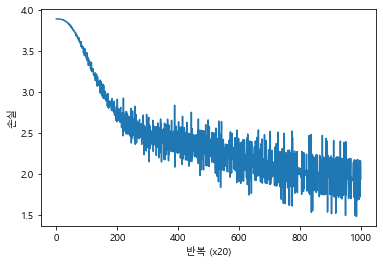

you [-0.01356697 -0.01091373 -0.00417335  0.00766306 -0.01728592]
say [-0.41878057 -0.39940855 -0.95552534 -0.9189243  -0.27432096]
goodbye [ 0.78635144  0.7568374   0.70676064  0.7573828  -1.2223779 ]
and [-1.1332189  -1.1285937  -0.9468037  -0.97225654  1.3407996 ]
i [ 0.78689736  0.7642622   0.701407    0.74795854 -1.2200773 ]
hello [0.79263574 0.89465034 1.0263431  0.92792803 0.85277945]
. [-0.00117725 -0.00952616 -0.0070729   0.00537401 -0.00483023]


In [2]:
import sys
sys.path.append('..')  
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])